<a href="https://colab.research.google.com/github/pi-mishra/BCG-Data-science-and-analytics-internship/blob/main/BCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
client_d = pd.read_csv('/content/drive/MyDrive/BCG_data/client_data.csv')
price_d = pd.read_csv('/content/drive/MyDrive/BCG_data/price_data.csv')

## Client_data.csv

● id = client company identifier

● activity_new = category of the company’s activity

● channel_sales = code of the sales channel

● cons_12m = electricity consumption of the past 12 months

● cons_gas_12m = gas consumption of the past 12 months

● cons_last_month = electricity consumption of the last month

● date_activ = date of activation of the contract

● date_end = registered date of the end of the contract

● date_modif_prod = date of the last modification of the product

● date_renewal = date of the next contract renewal

● forecast_cons_12m = forecasted electricity consumption for next 12 months

● forecast_cons_year = forecasted electricity consumption for the next calendar year

● forecast_discount_energy = forecasted value of current discount

● forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months

● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)

● forecast_price_energy_peak = forecasted energy price for 2nd period (peak)

● forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

● has_gas = indicated if client is also a gas client

● imp_cons = current paid consumption

● margin_gross_pow_ele = gross margin on power subscription

● margin_net_pow_ele = net margin on power subscription

● nb_prod_act = number of active products and services

● net_margin = total net margin

● num_years_antig = antiquity of the client (in number of years)

● origin_up = code of the electricity campaign the customer first subscribed to

● pow_max = subscribed power

● churn = has the client churned over the next 3 months

## price_data.csv

● id = client company identifier

● price_date = reference date

● price_off_peak_var = price of energy for the 1st period (off peak)

● price_peak_var = price of energy for the 2nd period (peak)

● price_mid_peak_var = price of energy for the 3rd period (mid peak)

● price_off_peak_fix = price of power for the 1st period (off peak)

● price_peak_fix = price of power for the 2nd period (peak)

● price_mid_peak_fix = price of power for the 3rd period (mid peak)

# Data overview

In [ ]:
client_d.head().transpose()

,0,1,2,3,4
id,24011ae4ebbe3035111d65fa7c15bc57,d29c2c54acc38ff3c0614d0a653813dd,764c75f661154dac3a6c254cd082ea7d,bba03439a292a1e166f80264c16191cb,149d57cf92fc41cf94415803a877cb4b
channel_sales,foosdfpfkusacimwkcsosbicdxkicaua,MISSING,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,MISSING
cons_12m,0,4660,544,1584,4425
cons_gas_12m,54946,0,0,0,0
cons_last_month,0,0,0,0,526
date_activ,2013-06-15,2009-08-21,2010-04-16,2010-03-30,2010-01-13
date_end,2016-06-15,2016-08-30,2016-04-16,2016-03-30,2016-03-07
date_modif_prod,2015-11-01,2009-08-21,2010-04-16,2010-03-30,2010-01-13
date_renewal,2015-06-23,2015-08-31,2015-04-17,2015-03-31,2015-03-09
forecast_cons_12m,0.0,189.95,47.96,240.04,445.75


In [ ]:
price_d.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [ ]:
print(f'shape of client_d = ',client_d.shape)
print(f'shape of price_d = ',price_d.shape)

shape of client_d =  (14606, 26)
shape of price_d =  (193002, 8)


In [ ]:
client_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
price_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
client_d.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [ ]:
price_d.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [ ]:
client_d.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [ ]:
price_d.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [ ]:
client_d.duplicated().sum()

0

In [ ]:
price_d.duplicated().sum()

0

In [ ]:
columns_c = client_d.columns

for i in columns_c:
  print(i,'=',client_d[i].nunique())

id = 14606
channel_sales = 8
cons_12m = 11065
cons_gas_12m = 2112
cons_last_month = 4751
date_activ = 1796
date_end = 368
date_modif_prod = 2129
date_renewal = 386
forecast_cons_12m = 13993
forecast_cons_year = 4218
forecast_discount_energy = 12
forecast_meter_rent_12m = 3528
forecast_price_energy_off_peak = 516
forecast_price_energy_peak = 329
forecast_price_pow_off_peak = 41
has_gas = 2
imp_cons = 7752
margin_gross_pow_ele = 2391
margin_net_pow_ele = 2391
nb_prod_act = 10
net_margin = 11965
num_years_antig = 13
origin_up = 6
pow_max = 698
churn = 2


In [ ]:
columns_p = price_d.columns

for i in columns_p:
  print(i,'=',price_d[i].nunique())

id = 16096
price_date = 12
price_off_peak_var = 1853
price_peak_var = 1189
price_mid_peak_var = 711
price_off_peak_fix = 66
price_peak_fix = 31
price_mid_peak_fix = 28


# Data Wrangling

In [ ]:
client_d.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [ ]:
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

for i in date_columns:
  client_d[i] = pd.to_datetime(client_d[i])

In [ ]:
client_d[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']]

,date_activ,date_end,date_modif_prod,date_renewal
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23
1,2009-08-21,2016-08-30,2009-08-21,2015-08-31
2,2010-04-16,2016-04-16,2010-04-16,2015-04-17
3,2010-03-30,2016-03-30,2010-03-30,2015-03-31
4,2010-01-13,2016-03-07,2010-01-13,2015-03-09
...,...,...,...,...
14601,2012-05-24,2016-05-08,2015-05-08,2014-05-26
14602,2012-08-27,2016-08-27,2012-08-27,2015-08-28
14603,2012-02-08,2016-02-07,2012-02-08,2015-02-09
14604,2012-08-30,2016-08-30,2012-08-30,2015-08-31


In [ ]:
price_d.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [ ]:
price_d['price_date'] = pd.to_datetime(price_d['price_date'])

In [ ]:
price_d['price_date']

0        2015-01-01
1        2015-02-01
2        2015-03-01
3        2015-04-01
4        2015-05-01
            ...    
192997   2015-08-01
192998   2015-09-01
192999   2015-10-01
193000   2015-11-01
193001   2015-12-01
Name: price_date, Length: 193002, dtype: datetime64[ns]

# Data visualisation

In [ ]:
client_d.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

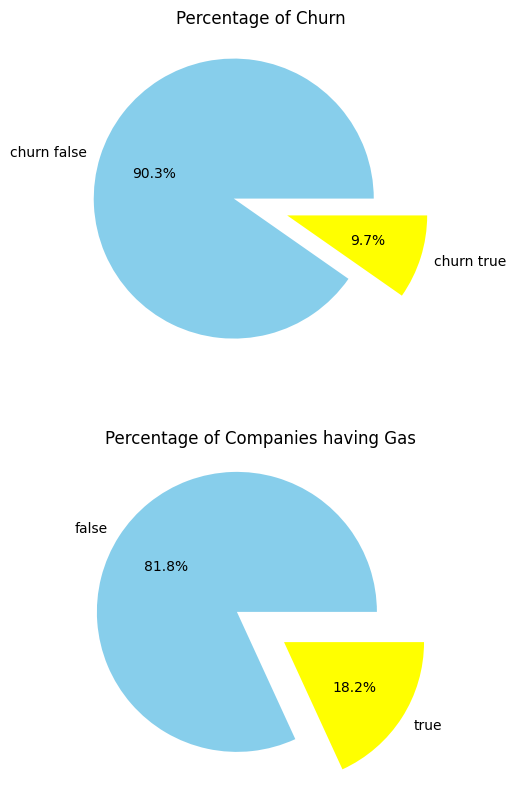

In [ ]:
plt.figure(figsize=(10,10))

#plotting the 1st graph
plt.subplot(2,1,1)
churn_percentage = client_d["churn"].value_counts() / len(client_d) # Calculate the percentage of churn
labels = ["churn false", "churn true"] # Create the labels
plt.pie(churn_percentage, labels=labels, colors=['skyblue', 'yellow'],autopct='%1.1f%%',explode=[0.2, 0.2])# Create the pie chart
plt.title("Percentage of Churn") # Add a title

#plotting the 2nd graph
plt.subplot(2,1,2)
churn_percentage = client_d["has_gas"].value_counts() / len(client_d)
labels = ["false", "true"]
plt.pie(churn_percentage, labels=labels, colors=['skyblue', 'yellow'],autopct='%1.1f%%',explode=[0.2, 0.2])
plt.title("Percentage of Companies having Gas")

plt.show()

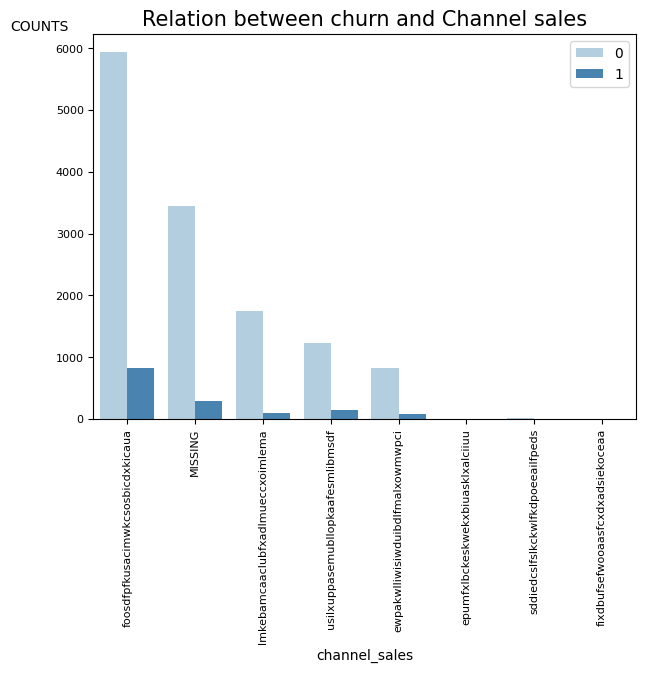

In [ ]:
fig, axz = plt.subplots(figsize=(7,5))

axz = sns.countplot(x='channel_sales', hue='churn', data=client_d, palette='Blues')

axz.set_title('Relation between churn and Channel sales', fontsize=15)
axz.set_ylabel('COUNTS', rotation=0, labelpad=50,size=10)
axz.set_xlabel('channel_sales', size=10)
axz.yaxis.set_label_coords(-0.1, 1.0)  # (x, y)
axz.legend(loc=0,fontsize=10);

axz.tick_params(labelsize=8)

# Rotate the x-axis labels by 90 degrees
axz.set_xticklabels(axz.get_xticklabels(), rotation=90)

plt.show()

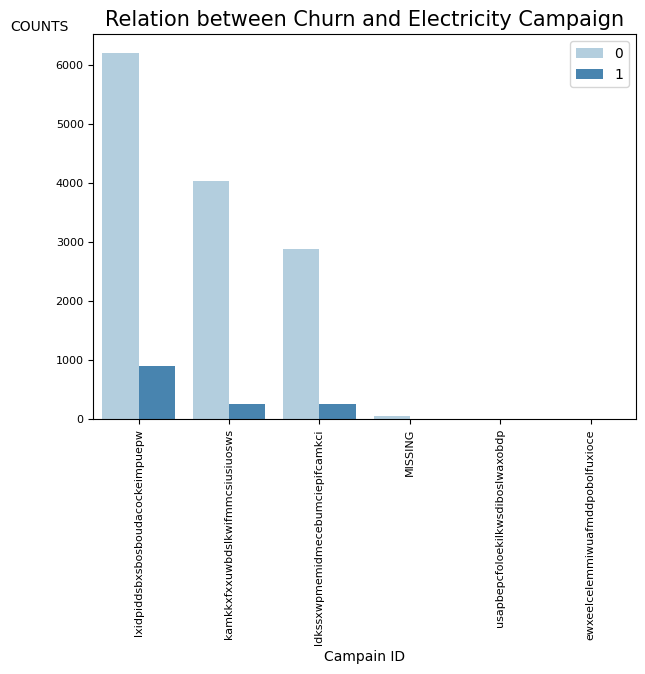

In [ ]:
fig, axz = plt.subplots(figsize=(7,5))

axz = sns.countplot(x='origin_up', hue='churn', data=client_d, palette='Blues')

axz.set_title('Relation between Churn and Electricity Campaign', fontsize=15)
axz.set_ylabel('COUNTS', rotation=0, labelpad=50,size=10)
axz.set_xlabel('Campain ID', size=10)
axz.yaxis.set_label_coords(-0.1, 1.0)  # (x, y)
axz.legend(loc=0,fontsize=10);

axz.tick_params(labelsize=8)

# Rotate the x-axis labels by 90 degrees
axz.set_xticklabels(axz.get_xticklabels(), rotation=90)

plt.show()

Skewness cons_12m : 5.997308122068939


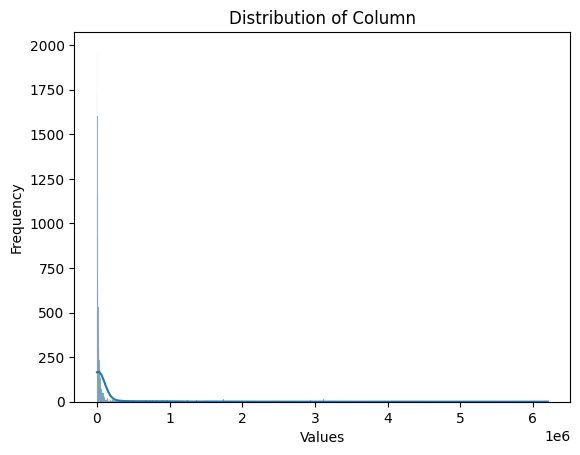

Skewness cons_gas_12m : 9.59752998980867


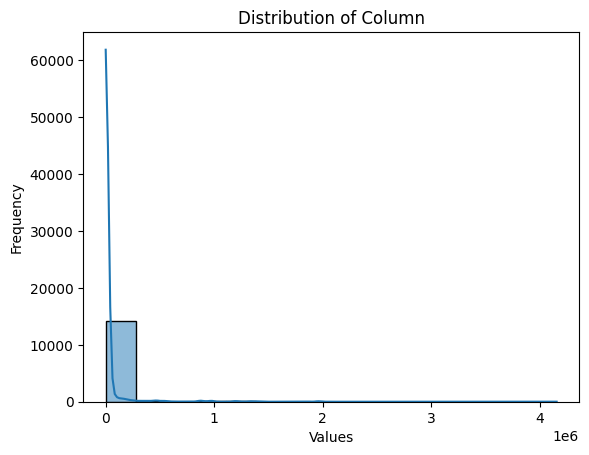

Skewness cons_last_month : 6.391406974903164


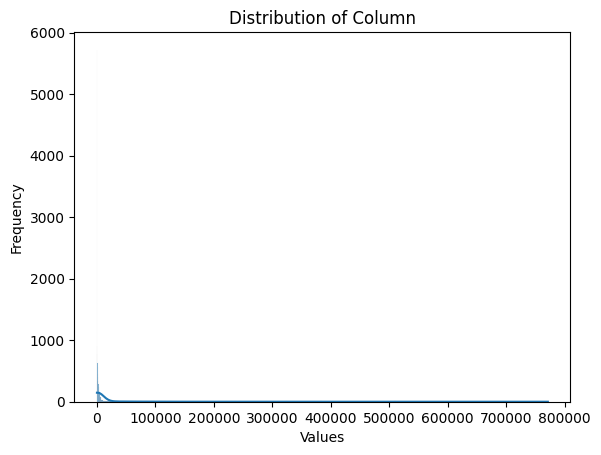

Skewness forecast_cons_12m : 7.155852615615487


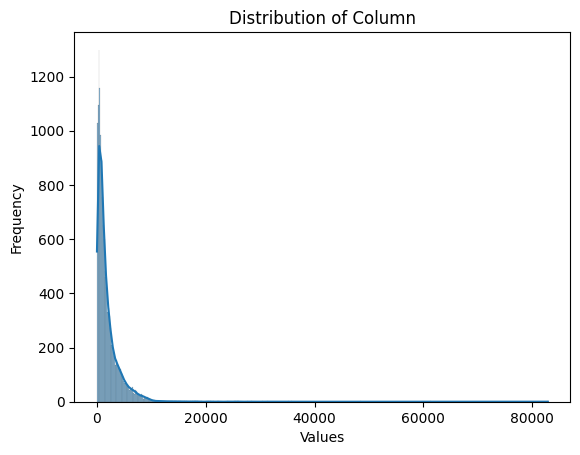

Skewness forecast_cons_year : 16.587989682280156


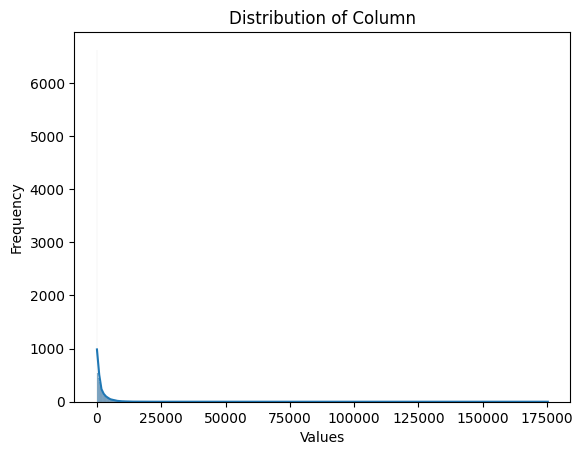

Skewness forecast_discount_energy : 5.155098289065647


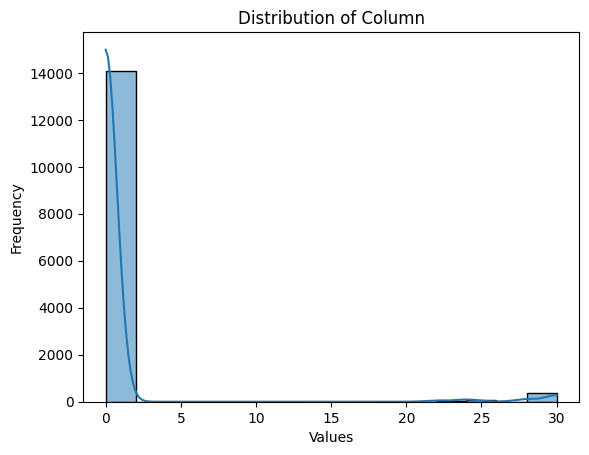

Skewness forecast_meter_rent_12m : 1.5051478520584571


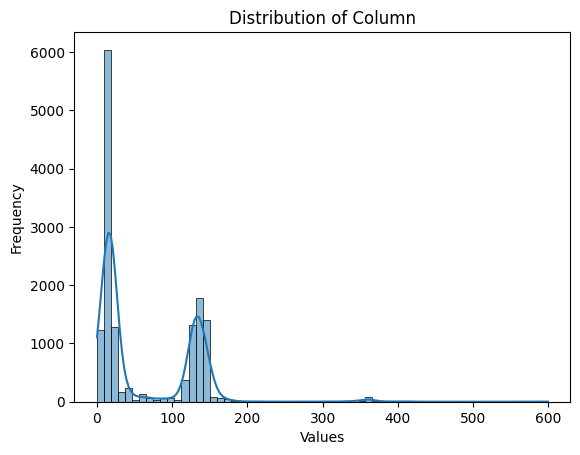

Skewness forecast_price_energy_off_peak : -0.11958602474988272


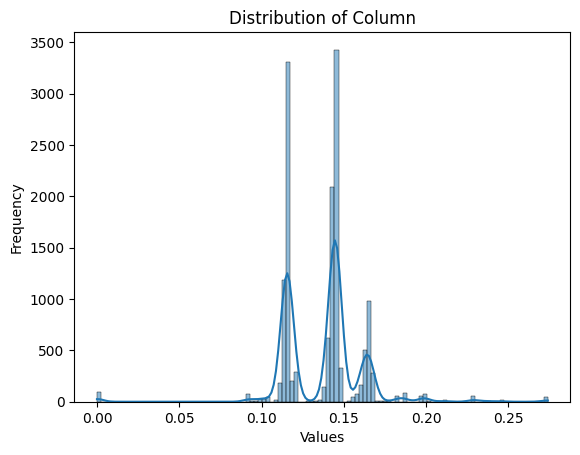

Skewness forecast_price_energy_peak : -0.014331427861824115


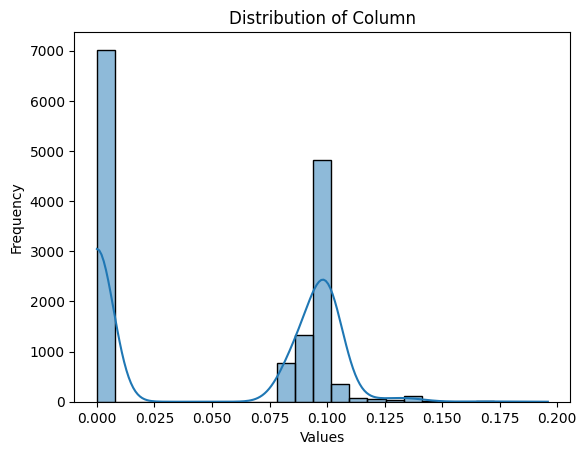

Skewness forecast_price_pow_off_peak : -4.998771993850156


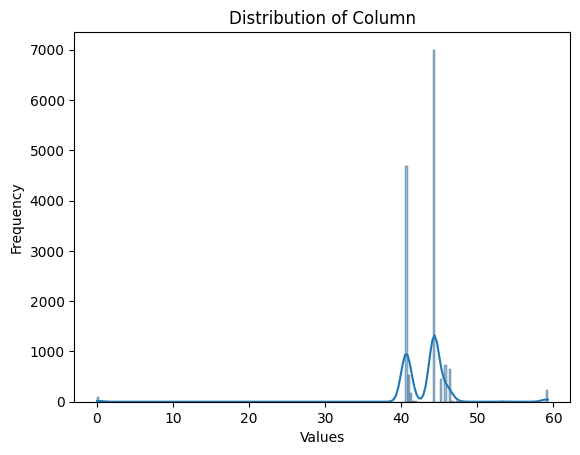

Skewness imp_cons : 13.19879897169991


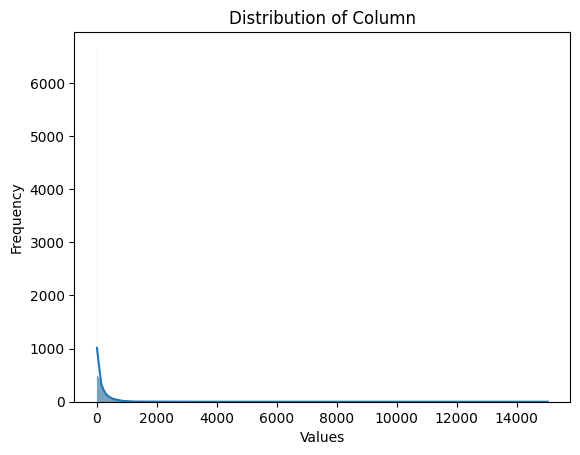

Skewness margin_gross_pow_ele : 4.472632134993316


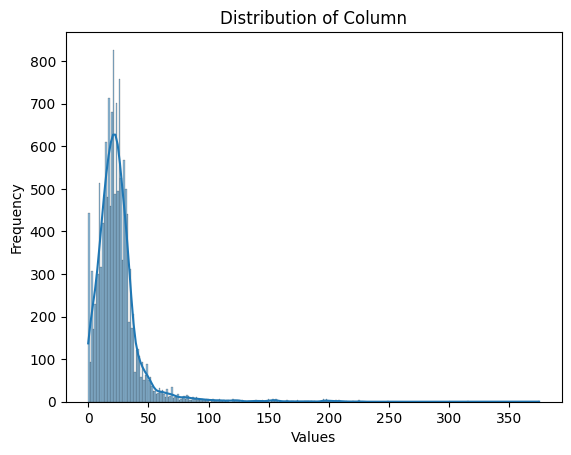

Skewness margin_net_pow_ele : 4.473325821517542


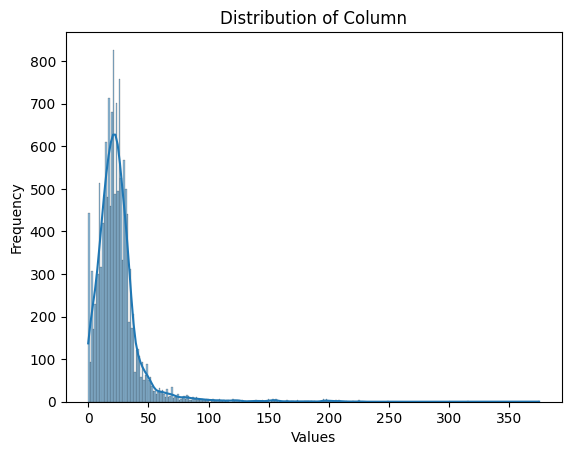

Skewness nb_prod_act : 8.636877937187974


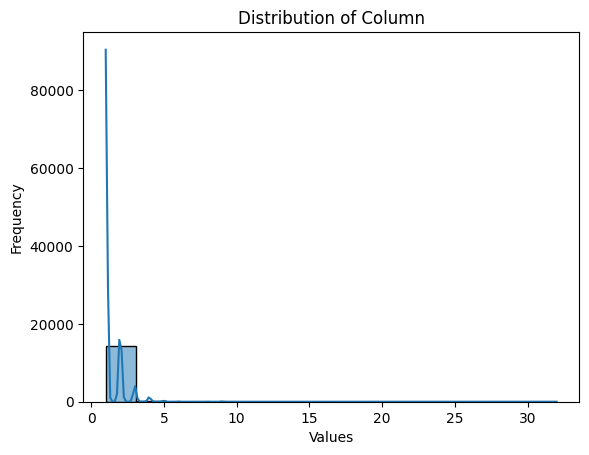

Skewness net_margin : 36.56951466408974


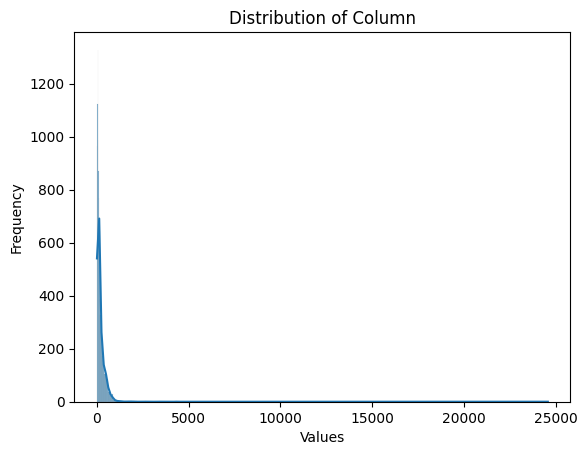

Skewness num_years_antig : 1.4462138232506747


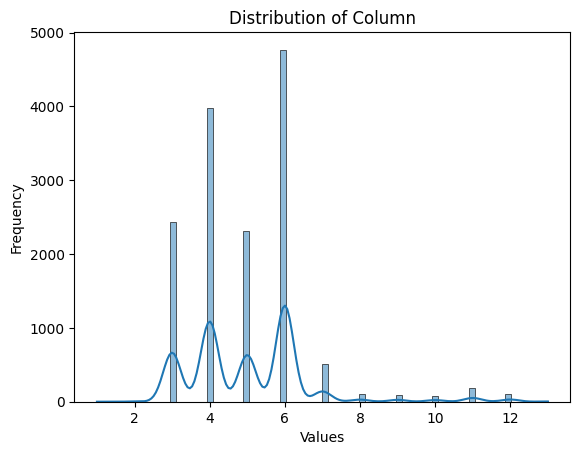

In [ ]:
col1 = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 
      'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 
      'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 
      'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig']

for i in col1:
  skewness = client_d[i].skew()
  print('Skewness',i,':', skewness)
  sns.histplot(data=client_d, x=i, kde=True)
  plt.title('Distribution of Column')
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()

Skewness price_off_peak_var : -0.3118790833132381


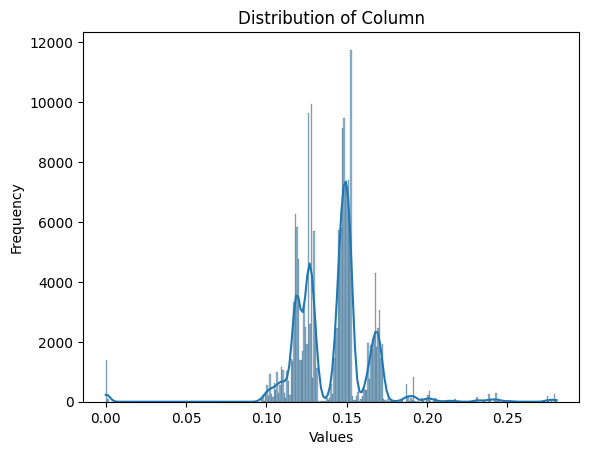

Skewness price_peak_var : -0.13329165939928472


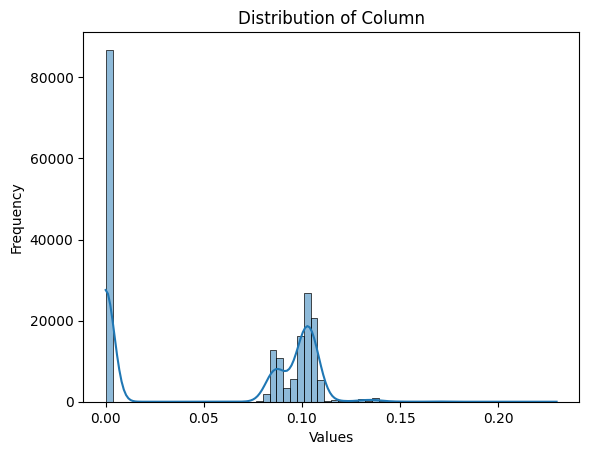

Skewness price_mid_peak_var : 0.3655081223222031


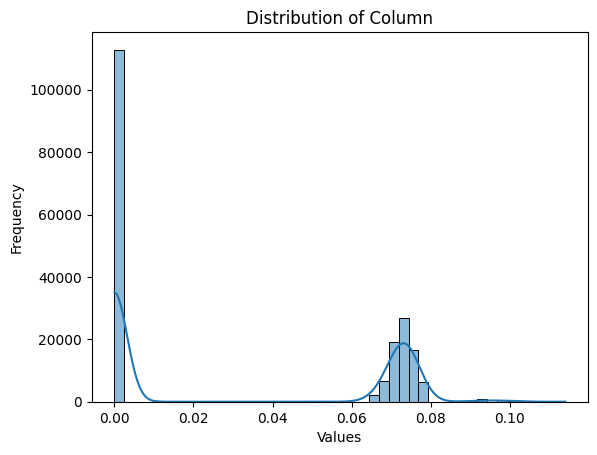

Skewness price_off_peak_fix : -2.889775176639383


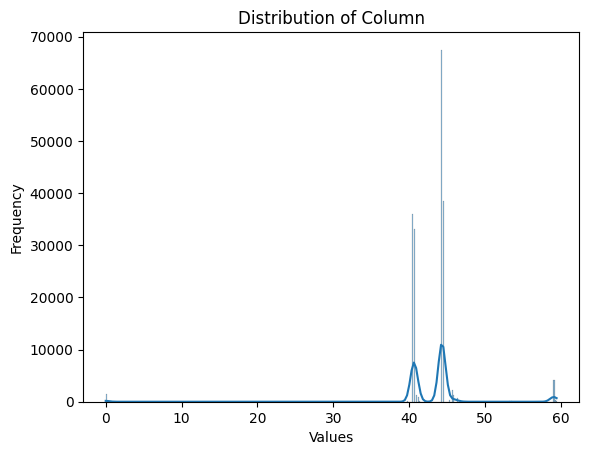

Skewness price_peak_fix : 0.47170917552575636


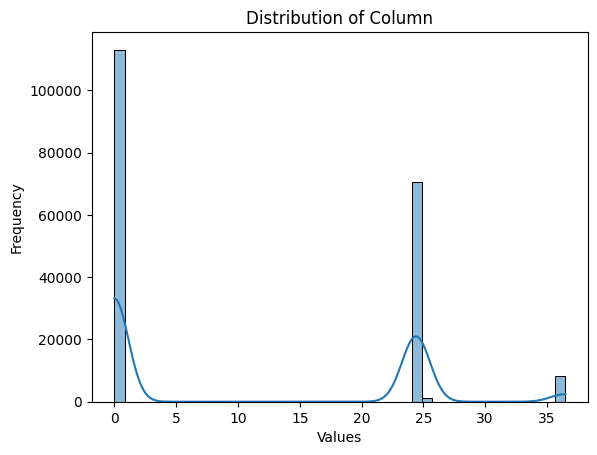

Skewness price_mid_peak_fix : 0.4330758598164017


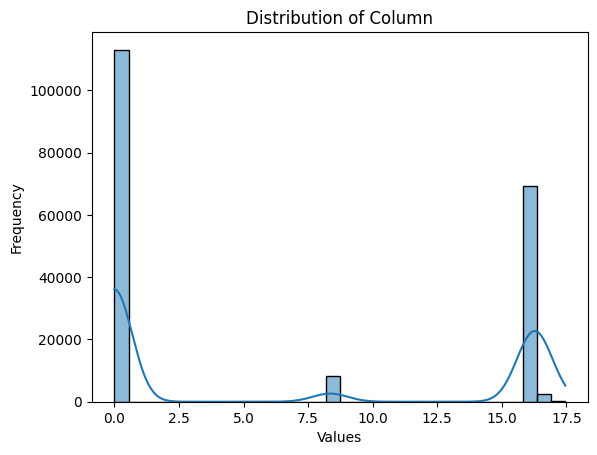

In [ ]:
col2 = ['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']

for i in col2:
   skewness = price_d[i].skew()
   print('Skewness',i,':', skewness)
   sns.histplot(data=price_d, x=i, kde=True)
   plt.title('Distribution of Column')
   plt.xlabel('Values')
   plt.ylabel('Frequency')
   plt.show()